# Linear classification using TensorFlow on diabetes.csv dataset

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


### Normalize the dataset

In [4]:
cols_to_norm = ['Number_pregnant','Glucose_concentration','Blood_pressure','Triceps','Insulin','BMI','Pedigree']

In [5]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

### Create numeric column for each feature column

In [6]:
import tensorflow as tf

In [7]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

### Put all feature columns together

In [8]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_buckets]

### Split training and test data

In [9]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [10]:
#Drop the 'Class' column for test data as it will be predicted by model 
x_data = diabetes.drop('Class',axis=1)

In [11]:
labels = diabetes['Class']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33,random_state=101)
print('Train:', len(X_train)), print('Test:', len(X_test))

Train: 514
Test: 254


(None, None)

In [14]:
import matplotlib.pyplot as plt

### Input function for training

In [16]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

### Creating the model instance and training it

In [17]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\arant\\AppData\\Local\\Temp\\tmpnh7bogod', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019CE97608D0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [18]:
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\arant\AppData\Local\Temp\tmpnh7bogod\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 77.8056
INFO:tensorflow:loss = 4.244333, step = 101 (1.301 sec)
INFO:tensorflow:global_step/sec: 282.004
INFO:tensorflow:loss = 5.5777316, step = 201 (0.334 sec)
INFO:

### Evaluate performance

In [19]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [20]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-05T06:58:36Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\arant\AppData\Local\Temp\tmpnh7bogod\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-05-06:58:39
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72440946, accuracy_baseline = 0.65748036, auc = 0.78205657, auc_precision_recall = 0.6202096, average_loss = 0.53573775, global_step = 1000, label/mean = 0.34251967, loss = 5.233746, precision = 0.60240966, prediction/mean = 0.36950204, recall = 0.57471263
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\arant\AppData\Local

In [21]:
results

{'accuracy': 0.72440946,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78205657,
 'auc_precision_recall': 0.6202096,
 'average_loss': 0.53573775,
 'label/mean': 0.34251967,
 'loss': 5.233746,
 'precision': 0.60240966,
 'prediction/mean': 0.36950204,
 'recall': 0.57471263,
 'global_step': 1000}

### Make predictions

In [22]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [23]:
predictions = model.predict(pred_input_func)

In [24]:
predictions = list(predictions)
predictions

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\arant\AppData\Local\Temp\tmpnh7bogod\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.16371799], dtype=float32),
  'logistic': array([0.5408383], dtype=float32),
  'probabilities': array([0.45916167, 0.5408383 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.5875894], dtype=float32),
  'logistic': array([0.64281183], dtype=float32),
  'probabilities': array([0.35718814, 0.64281183], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.45186204], dtype=float32),
  'logistic': array([0.38891816], dtype=float32),
  'probabilities': array([0.61108184, 0.3889181 ], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.8238077], dtype=float32),
  'logistic': array([0.30495602], dtype=float32),
  'probabilities': array([0.69504404, 0.304956  ], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits

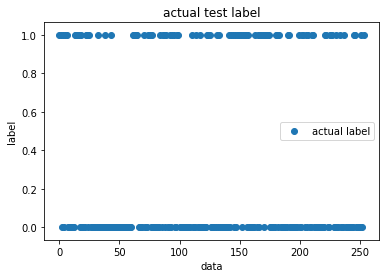

In [27]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])
plt.scatter(range(len(X_test)), y_test)
plt.title('actual test label')
plt.ylabel('label')
plt.xlabel('data')
plt.legend(['actual label'], loc='center right')

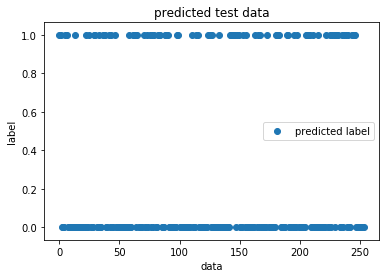

In [28]:
plt.scatter(range(len(X_test)), final_preds)
plt.title('predicted test data')
plt.ylabel('label')
plt.xlabel('data')
plt.legend(['predicted label'], loc='center right')